In [423]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os


In [424]:
from matplotlib import style
style.use('dark_background')

In [425]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')


## M31 results from model

In [426]:
#M31
# Radius
arcsec_r = np.array([  100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

# sigma_los using model without warp (C. Carignan suggested I should use this model)
kms_sigma = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82, 11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])

# sigma_los using model WITH warp
kms_sigma_warp = np.array([12.05, 15.64, 15.70, 10.75, 8.71, 5.82, 6.08, 8.23, 9.48, 11.61, 13.61, 12.37, 7.77, 6.22, 5.98, 5.38, 5.47, 6.62, 8.16, 8.31, 8.67, 9.30, 9.67, 8.51, 7.51, 6.32, 6.13, 6.52, 9.29, 10.66, 11.48, 10.77, 10.61, 11.23, 12.05, 11.80, 11.42, 10.91, 8.56, 6.32, 5.45, 4.81, 5.43, 6.68, 10.43, 10.71, 10.95, 10.25, 9.16, 8.87, 9.05, 8.72, 8.98, 8.49, 9.61, 6.84, 6.16, 6.88, 9.87, 9.87, 9.85, 8.62, 7.97, 7.54, 7.19, 7.99, 8.30, 8.56, 7.14, 7.23, 7.85, 7.05, 7.49, 6.64, 8.34, 7.07, 5.53, 5.61, 4.06, 4.75, 8.15, 7.09, 5.89, 6.24, 5.59, 5.59, 4.49, 3.81, 2.61, 3.57, 4.67, 5.37, 6.67, 4.19, 5.09, 4.45, 4.40, 4.53, 5.62, 5.20])


In [427]:
#converted data
mpc_gal_dist = 0.78 #from Beck et al 
fac = mpc_gal_dist*np.pi/(180*(60*60))
mpc_radius = fac*arcsec_r
mpc = 1
kpc = 1e+3*mpc
kpc_radius = kpc*mpc_radius
kms_dat_v = np.sqrt(3)*kms_sigma
kms_dat_v_warp = np.sqrt(3)*kms_sigma_warp


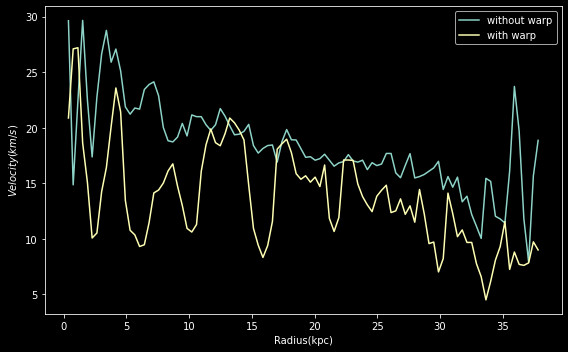

In [428]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'without warp')
ax.plot(kpc_radius, kms_dat_v_warp, label = 'with warp')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$Velocity(km/s)$')
ax.legend()
# ax.grid(b=True, which='major', color=[.6, .6, .6], linestyle='-')
# ax.grid(b=False, which='minor', color=[.6, .6, .6], linestyle=':')

In [444]:
kms = 1e+5
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
cms_cs = cs.evalf(subs={gamma: 1.5, boltz: 1.38e-16, T:1e+4, mu:14/11, mh:1.67e-24})
print('Value of cs is {} and the max value of u is {}'.format(cms_cs,(kms_dat_v*kms).max()))
if np.sqrt(2)*cms_cs < (kms_dat_v*kms).max(): print('$M>>\sqrt(2)$')
else : print('$M<<\sqrt(2)$')


Value of cs is 986868.443212531 and the max value of u is 2965270.982557918
$M>>\sqrt(2)$


In [430]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]
script_dir = os.getcwd()  # <-- absolute dir the script is in
model_name = "\model3c.txt"
rel_path = "model_scripts" + model_name
abs_file_path = os.path.join(script_dir, rel_path)
with open(abs_file_path, "rb") as inf:
    quantities = pickle.load(inf)


In [431]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]
vel = quantities[2]
vel

1.26148298767098e+29*pi**(26/153)*(E_51**(64/51)*G*Sigma_SFR*Sigma_tot*\delta/(m_**(T*gamma*k_B/(m_H*mu))**(2/3)*(G*Sigma_tot*\Sigma*mu/(T*gamma*k_B))**(76/51)))**(1/3)

In [432]:
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
const = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
         (cl, 3/4), (xio, 0.4), (calpha, 1), (Rk, 0.3), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1)]
variables = [(sigmatot, 10*Msun/(pcm)**2), (sigma, 1),
             (sigmasfr, 1), (omega, 1), (q, 1), (T, 1e+4)]

# plotting the scaling relations
observ = [sigma, sigmasfr, q, omega]

for obs in observ:
    variables.remove((obs, 1))
final = const + variables
z = vel.subs(final)
z.simplify(force=True)


26088205861.9495*pi**(26/153)*(Sigma_SFR/\Sigma**(76/51))**(1/3)

In [433]:
final_vel = []
for i in range(6,14,2):
    idx = np.where((kpc_radius>i)*(kpc_radius<i+2))
    final_vel.append(np.take(kms_dat_v,idx).mean())
final_vel = np.array(final_vel)

In [434]:
#data from Chamandy et al (2016)
kpc_dat_r = np.array([7, 9, 11, 13])
dat_omega = np.array([38.4, 31.1, 25.1, 21.1])
dat_q = np.array([0.75, 0.99, 1.07, 1.02])
dat_sigma1 = np.array([1.47, 2.17, 3.64, 4.05])
dat_sigma2 = np.array([0.266, 0.308, 0.665, 0.51])
dat_sigma = (dat_sigma1 + dat_sigma2)*Msun/(pcm)**2
dat_sigmasfr = np.array([0.443, 0.621, 0.794, 0.227])*Msun/((10**9*365*24*60*60)*(pcm)**2)


In [435]:
# from scipy.interpolate import interp1d
# fn = interp1d(kpc_radius, kms_dat_v ,kind = 'slinear', bounds_error= False, fill_value='extrapolate')

In [436]:
scalreldata = []
for sig, sigsfr in zip(dat_sigma, dat_sigmasfr):
    scalreldata.append(z.evalf(subs={sigma: sig, sigmasfr: sigsfr}))
scalreldata = np.array(np.float64(scalreldata))/kms
scalreldata


array([2.32166955, 2.17733695, 1.79618023, 1.14992856])

In [437]:
final_vel

array([22.66965832, 19.27079729, 20.63218922, 20.33138973])

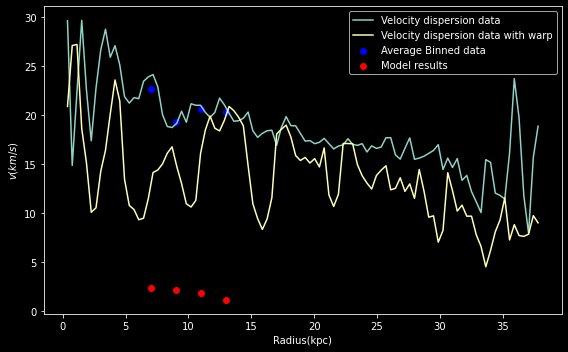

In [438]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion data')
ax.plot(kpc_radius, kms_dat_v_warp, label = 'Velocity dispersion data with warp')
ax.scatter(kpc_dat_r, final_vel, c = 'b', label = 'Average Binned data')
ax.scatter(kpc_dat_r, scalreldata,c = 'r', label = 'Model results')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$v(km/s)$')
ax.legend()